In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [67]:
points = {"blue": [[2,4], [1,3], [2,3], [3,2], [2,1]],
          "red": [[5,6], [4,5], [4,6], [6,6], [5,4]]}

In [68]:
new_point = [3,3]

In [69]:
def euclidean_distance(p, q):
    np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

In [70]:
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k
        self.point = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [73]:
clf = KNearestNeighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

blue


## Vizualização

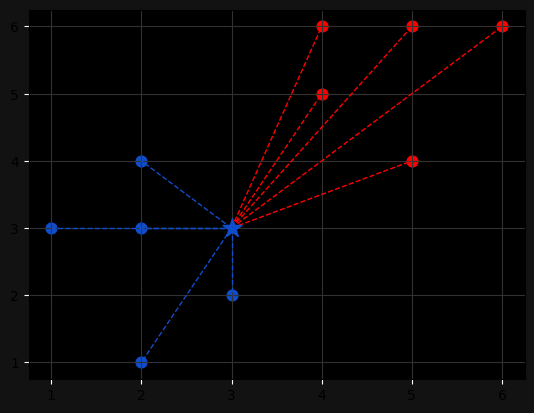

In [74]:
ax = plt.subplot()
ax.grid(True, color="#323232")
ax.figure.set_facecolor("#121212")
ax.set_facecolor("black")
ax.tick_params(axis="x", color="white")
ax.tick_params(axis="y", color="white")

for point in points['blue']:
    ax.scatter(point[0], point[1], color="#104DCA", s=60)

for point in points['red']:
    ax.scatter(point[0], point[1], color="#FF0000", s=60)

new_class = clf.predict(new_point)
color = "#FF0000" if new_class == "red" else "#104DCA"
ax.scatter(new_point[0], new_point[1], color=color, marker="*", s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color="#104DCA", linestyle="--", linewidth=1)

for point in points['red']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color="#FF0000", linestyle="--", linewidth=1)